In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import preprocessing as pp

## Using thesaurus' semantic related words

In [2]:
msr_data = pd.read_csv('data/msr_dataset.csv', encoding = 'ANSI')
msr_data['processed_token'] = pp.preprocess_tokens(msr_data)
y_msr = msr_data['class']
msr = msr_data.drop(columns=['class'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(msr, y_msr, train_size=0.8, 
                                                    random_state=33, shuffle=True)

msr_vectorizer = CountVectorizer(max_features=1000)

bow_train = msr_vectorizer.fit_transform(X_train['processed_token'])
sparse_matrix_train = pd.DataFrame(bow_train.toarray(), columns = msr_vectorizer.get_feature_names())
X_train_count = pp.concat_loc_sum(sparse_matrix_train, X_train)

bow_test = msr_vectorizer.transform(X_test['processed_token'])
sparse_matrix_test = pd.DataFrame(bow_test.toarray(), columns = msr_vectorizer.get_feature_names())
X_test_count = pp.concat_loc_sum(sparse_matrix_test, X_test)

msr_model = RandomForestClassifier(random_state=33)
msr_model.fit(X_train_count, y_train)
preds = msr_model.predict(X_test_count)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       283
           1       0.96      0.90      0.93       278

    accuracy                           0.93       561
   macro avg       0.94      0.93      0.93       561
weighted avg       0.94      0.93      0.93       561



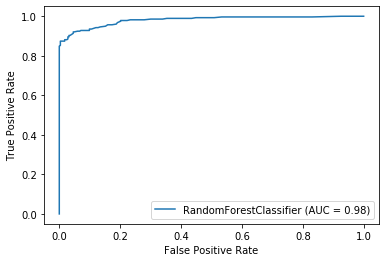

In [12]:
roc = plot_roc_curve(msr_model, X_test_count, y_test)

In [13]:
importances = pd.DataFrame(msr_model.feature_importances_, index = X_train_count.columns,
                            columns=['importance']).sort_values('importance', ascending=False)

importances[:15]

,importance
oozie,0.015873
crob,0.014928
taska,0.014632
testjob,0.012603
dag,0.012599
njobs,0.012486
submit,0.011741
app,0.010695
taskb,0.010471
table3,0.009409


Text(0, 0.5, 'Token')

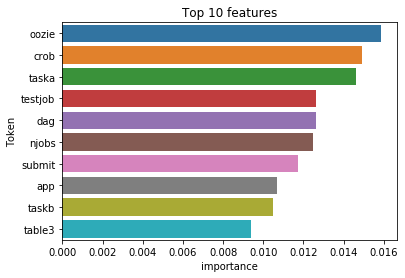

In [14]:
sns.barplot(y=importances.index[:10], x=importances['importance'][:10])
plt.title('Top 10 features')
plt.ylabel('Token')

### Evaluating MSR model on new data

In [15]:
new_data = pd.read_csv('data/new_dataset.csv')
new_data['processed_token'] = pp.preprocess_tokens(new_data)
y_new = new_data['class']
new_data = new_data.drop(columns=['class'])

In [17]:
X_new = msr_vectorizer.transform(new_data['processed_token'])
sparse_matrix_new = pd.DataFrame(X_new.toarray(), columns = msr_vectorizer.get_feature_names())
X_new_count = pp.concat_loc_sum(sparse_matrix_new, new_data)

new_preds = msr_model.predict(X_new_count)
print(classification_report(y_new, new_preds))

              precision    recall  f1-score   support

           0       0.51      0.98      0.67       724
           1       0.76      0.06      0.12       737

    accuracy                           0.52      1461
   macro avg       0.63      0.52      0.39      1461
weighted avg       0.63      0.52      0.39      1461



## Using thesaurus synonims

In [19]:
msr_data = pd.read_csv('data/msr_dataset.csv', encoding = 'ANSI')
msr_data['processed_token'] = pp.preprocess_tokens(msr_data, synset_option=1)
y_msr = msr_data['class']
msr = msr_data.drop(columns=['class'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(msr, y_msr, train_size=0.8, 
                                                    random_state=33, shuffle=True)

msr_vectorizer = CountVectorizer(max_features=1000)

bow_train = msr_vectorizer.fit_transform(X_train['processed_token'])
sparse_matrix_train = pd.DataFrame(bow_train.toarray(), columns = msr_vectorizer.get_feature_names())
X_train_count = pp.concat_loc_sum(sparse_matrix_train, X_train)

bow_test = msr_vectorizer.transform(X_test['processed_token'])
sparse_matrix_test = pd.DataFrame(bow_test.toarray(), columns = msr_vectorizer.get_feature_names())
X_test_count = pp.concat_loc_sum(sparse_matrix_test, X_test)

msr_model = RandomForestClassifier(random_state=33)
msr_model.fit(X_train_count, y_train)
preds = msr_model.predict(X_test_count)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       283
           1       0.97      0.92      0.95       278

    accuracy                           0.95       561
   macro avg       0.95      0.95      0.95       561
weighted avg       0.95      0.95      0.95       561



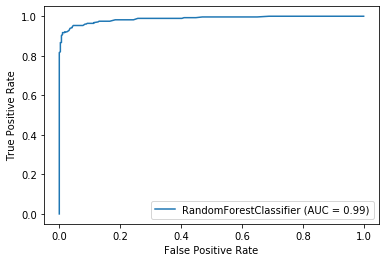

In [21]:
roc = plot_roc_curve(msr_model, X_test_count, y_test)

In [22]:
importances = pd.DataFrame(msr_model.feature_importances_, index = X_train_count.columns,
                            columns=['importance']).sort_values('importance', ascending=False)

importances[:15]

,importance
jobf,0.023889
tabele,0.023699
services,0.019618
loc,0.019208
actions,0.018668
coord,0.018343
actioin,0.018115
ooozie,0.015414
wf,0.012959
oozies,0.011335


Text(0, 0.5, 'Token')

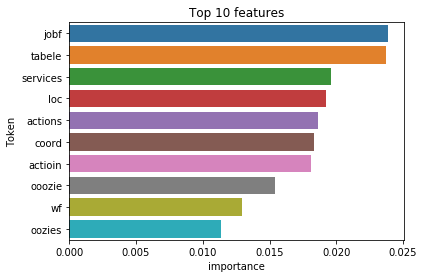

In [23]:
sns.barplot(y=importances.index[:10], x=importances['importance'][:10])
plt.title('Top 10 features')
plt.ylabel('Token')

### Evaluating MSR model on new data

In [24]:
new_data = pd.read_csv('data/new_dataset.csv')
new_data['processed_token'] = pp.preprocess_tokens(new_data, synset_option=1)
y_new = new_data['class']
new_data = new_data.drop(columns=['class'])

In [25]:
X_new = msr_vectorizer.transform(new_data['processed_token'])
sparse_matrix_new = pd.DataFrame(X_new.toarray(), columns = msr_vectorizer.get_feature_names())
X_new_count = pp.concat_loc_sum(sparse_matrix_new, new_data)

new_preds = msr_model.predict(X_new_count)
print(classification_report(y_new, new_preds))

              precision    recall  f1-score   support

           0       0.51      0.96      0.66       724
           1       0.68      0.08      0.14       737

    accuracy                           0.52      1461
   macro avg       0.59      0.52      0.40      1461
weighted avg       0.60      0.52      0.40      1461

